# Module 5 Exercises - Time Series

In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consectuive days (1 week) starting from the variable with today's date.

In [2]:
today = np.datetime64('today') # today's date
today + np.arange(7)

array(['2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
       '2019-03-25', '2019-03-26', '2019-03-27'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [3]:
index = pd.DatetimeIndex(['2016-02-11', '2016-07-01', '2016-07-09', '2016-10-08', '2017-02-18',
                         '2017-02-25', '2017-05-02', '2017-08-26', '2017-12-15', '2018-02-11'])
data = pd.Series([ 0,1,2,3,4,5,6,7,8,9], index=index)
data['2017']

2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [27]:
dates = pd.to_datetime([datetime(2017, 12, 15), '8th of October 2016', 
                      '20180211', '2017-02-25', '2019-Jan-16'])
dates

DatetimeIndex(['2017-12-15', '2016-10-08', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [28]:
pd.timedelta_range(0, periods=5, freq='1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [50]:
date = pd.to_datetime(np.datetime_as_string(today))
date + pd.to_timedelta(np.arange(20), 'D')

DatetimeIndex(['2019-03-20', '2019-03-21', '2019-03-22', '2019-03-23',
               '2019-03-24', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29', '2019-03-30', '2019-03-31',
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08'],
              dtype='datetime64[ns]', freq=None)

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Import the traveltime_s.csv file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

Text(0,0.5,'Weekly Average Speed')

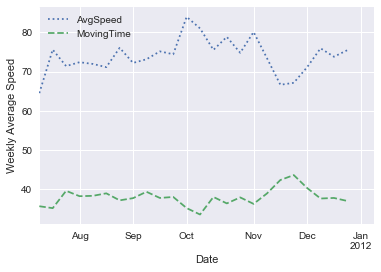

In [20]:
location = "datasets/datasets_smalltravel.csv"
df = pd.read_csv(location, index_col="Date", parse_dates=True)
#df.head()
#df.dtypes
#df.plot()
df.describe()
weekly = df.resample('W').mean()
#weekly
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Average Speed')
#df.head

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

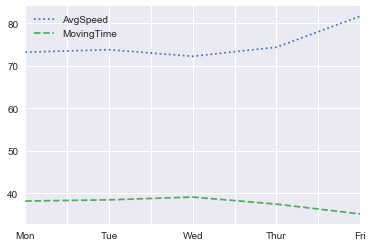

In [15]:
df.index.dayofweek
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
by_weekday.plot(style=[':','--','-'])